# Titanic: Machine Learning from Disaster

(https://www.kaggle.com/c/titanic/overview)

We start off by importing the basic Python libraries that will be needed throughout the whole time of this notebook and by loading the datasets into pandas DataFrames.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [17]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

## Exploratory Data Analysis (EDA)

The first step when tackling a new challenge or project should always be to first get to know the data. Therefore, we will start by looking at the data and the variables.

In [3]:
train.shape, test.shape

((891, 12), (418, 11))

We see that the training set contains 891 observations (rows) and 12 variables or features (columns). The test set contains less observations (418) and only 11 features. We will at first take a glimpse at the first few rows of each dataset.

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [19]:
train.columns, test.columns

(Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
        'Ticket', 'Fare', 'Cabin', 'Embarked'],
       dtype='object'),
 Index(['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
        'Fare', 'Cabin', 'Embarked'],
       dtype='object'))

We can see that both datasets contain exactly the same variables except for "Survived", which is missing in the test dataset since this is the variable we want to predict. It is a dummy variable, 1 means survived, 0 means not survived. The "Name" variable has unique values for every person and does not predict the survival chance in any case, therefore we can just drop this variable.

In [18]:
train = train.drop("Name", axis=1)
test = test.drop("Name", axis=1)

As a next step we can look at the data types of the variables.

In [24]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.6+ KB


The variables "Sex", "Ticket", "Cabin" and "Embarked" are categorical data, the remaining features are numerical. We will first look at the numerical variables in more detail and then at the categorical variables. 

In order to see which variables have an influence on the chance of survival, we will also investigate the relation between each variable and the Target Variable "Survived".

### Numerical Features

#### Survived

We start with the target variable, indicating if a passenger has survived the sinking of the Titanic.

(0.3838383838383838, <matplotlib.axes._subplots.AxesSubplot at 0x21aed423e10>)

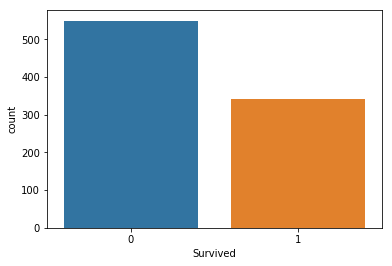

In [42]:
np.mean(train.Survived), sns.countplot(data=train, x="Survived")

Around 38,3% survived the Titanic.

#### Pclass

In [45]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Pclass is short for Passenger Class and gives the class to which the passenger belong. 1 is the most expensive class, 3 the cheapest one. As expected most passengers belong to class 3, while class 1 contains the least passengers.

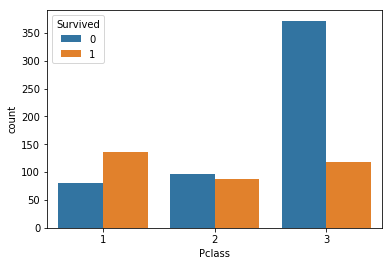

In [48]:
sns.countplot(data=train, x="Pclass", hue="Survived")

In [52]:
for i in [1,2,3]:
    print(np.mean(train.Survived[train["Pclass"]==i]))

0.6296296296296297
0.47282608695652173
0.24236252545824846


The fraction of passengers, which have survived is 63.0% for the first class, 47.3% for the second class and only 24.2% for the third class. The fraction of people surviving is therefore above the fraction of all people surviving the catastrophe for the first and second class and way below the mean for the third class. We can already see here that the class does play a very important role in surviving and that in the first class almost 2 out of 3 passengers survived.

#### Age

Since age is a continuous variable we can picture its distribution using a histogram and a kernel density estimator.

TypeError: numpy boolean subtract, the `-` operator, is deprecated, use the bitwise_xor, the `^` operator, or the logical_xor function instead.

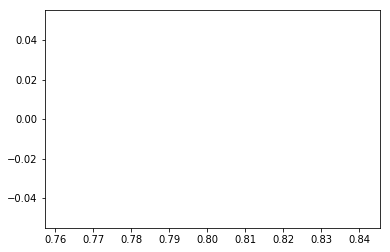

In [59]:
sns.distplot(train["Age"])

Running the above code yields an error since there are missing values for Age in the training dataset. Therefore, we first have to fix this issue.

In [62]:
train.Age.isnull().sum()

177

In [144]:
agemean1, agemean2, agemean3 = train["Age"].groupby([train["Pclass"]]).mean()
agemean1, agemean2, agemean3

(38.233440860215055, 29.87763005780347, 25.14061971830986)

There are 177 missing values for the Age. We compute the mean in each class and will use these means to impute the missing values in the training dataset.

In [150]:
miss_age = np.isnan(train["Age"])
class_1 = train["Pclass"] == 1
class_2 = train["Pclass"] == 2
class_3 = train["Pclass"] == 3
train.loc[class_1, "Age"] = train.loc[class_1, "Age"].fillna(agemean1)
train.loc[class_2, "Age"] = train.loc[class_2, "Age"].fillna(agemean2)
train.loc[class_3, "Age"] = train.loc[class_3, "Age"].fillna(agemean3)
train.Age.isnull().sum()

0

Now we can again run the above code and plot the histogram.

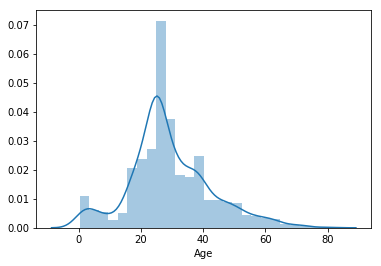

In [154]:
sns.distplot(train["Age"])

We can also plot the distribution of age by survival.

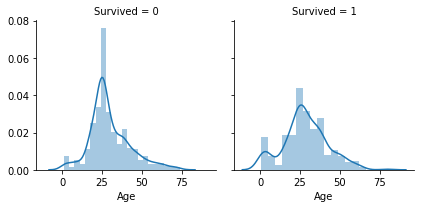

In [161]:
grid = sns.FacetGrid(data=train, col="Survived")
grid.map(sns.distplot, "Age")

#### SibSp

In [162]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

The variable SibSp contains information about the passenger having Siblings or Spouses aboart the titanic. Most people seem to be alone, or at least without any siblings or spouse. A large number of passengers do have 1 sibling or his/her spouse with them, those are probably mostly married couples. There also seem to be a few families.

#### Parch

In [164]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Similar to the variable before, "Parch" states the number of the passenger's parents or children aboard the ship. It also indicates that most passengers are alone, however, there seem to be a few families.

#### Ticket

In [165]:
train.Ticket.value_counts()

347082               7
CA. 2343             7
1601                 7
347088               6
CA 2144              6
3101295              6
S.O.C. 14879         5
382652               5
4133                 4
347077               4
17421                4
349909               4
W./C. 6608           4
113781               4
2666                 4
19950                4
PC 17757             4
LINE                 4
113760               4
347742               3
PC 17572             3
248727               3
PC 17582             3
SC/Paris 2123        3
C.A. 31921           3
345773               3
PC 17760             3
C.A. 34651           3
363291               3
371110               3
                    ..
347078               1
SC/PARIS 2131        1
349239               1
347061               1
345779               1
384461               1
349214               1
C.A. 24579           1
28134                1
W./C. 6609           1
350026               1
3101281              1
349244     

The "Ticket" feature contains the Ticket number. These are mainly unique values, therefore not adding much explanatory power to our prediction model. Thus, we just drop this column as well.

In [166]:
train = train.drop("Ticket", axis=1)
test = test.drop("Ticket", axis=1)